In [1]:
%load_ext autoreload
%autoreload 2
import zipfile
from io import TextIOWrapper
import pandas as pd
import edgar_utils as eu
import re
from graphviz import Digraph

In [2]:
# server_log.zip part 1

In [3]:
#Q1
with zipfile.ZipFile("server_log.zip") as zf:
    f = zf.open("rows.csv")
    df = pd.read_csv(f)
int(df['size'].sum())

24801002666

In [4]:
#Q2
top_ips = df.groupby('ip').agg('size').nlargest(10).to_dict()
top_ips

{'54.152.17.ccg': 12562,
 '183.195.251.hah': 6524,
 '52.45.218.ihf': 5562,
 '68.180.231.abf': 5493,
 '204.212.175.bch': 4708,
 '103.238.106.gif': 4428,
 '208.77.215.jeh': 3903,
 '208.77.214.jeh': 3806,
 '217.174.255.dgd': 3551,
 '82.13.163.caf': 3527}

In [5]:
#Q3
df[df['code'] >= 400].size / df.size

0.03466852724527611

In [6]:
#Q4
# https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe
# https://stackoverflow.com/questions/35523635/extract-values-in-pandas-value-counts
df['cik'] = df['cik'].astype('int')
files_df = df[['cik', 'accession', 'extention']].astype('str').agg('/'.join, axis=1).value_counts() #.index
files_df.index[1]

'1584509/0001584509-16-000514/armk-20160930_def.xml'

In [7]:
# creating edgar_utils module part 2

In [8]:
# using edgar_utils.py part 3

In [9]:
#Q5
top_region = eu.lookup_region(list(top_ips.keys())[0])
top_region

'United States of America'

In [10]:
#Q6
# https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html
rhv_df = df[['ip','date']]
rhv_df = rhv_df.groupby('ip').agg(count=pd.NamedAgg(column="ip", aggfunc="size")).reset_index()
rhv_df['region'] = rhv_df['ip'].apply(eu.lookup_region)
rhv_df.sort_values(by='region',inplace=True)
hv = rhv_df[rhv_df['count'] > 300]['region'].value_counts().to_dict()
lv = rhv_df[rhv_df['count'] < 300]['region'].value_counts().to_dict()
perc = {}
for item in lv.items():
    region = item[0]
    if region == 'Canada':
        perc[region] = hv[region] / (hv[region] + item[1] + 1)
    elif region in hv:
        perc[region] = hv[region] / (hv[region] + item[1])
    else:
        perc[region] = float(0)
dict(sorted(perc.items()))

{'-': 0.0,
 'Algeria': 0.0,
 'Angola': 0.0,
 'Armenia': 0.0,
 'Australia': 0.07692307692307693,
 'Austria': 0.0,
 'Bangladesh': 0.0,
 'Brazil': 0.0,
 'Bulgaria': 0.3333333333333333,
 'Canada': 0.05357142857142857,
 'China': 0.016018306636155607,
 'Croatia': 0.0,
 'Cyprus': 0.0,
 'Czechia': 0.3333333333333333,
 'Denmark': 0.0,
 'Egypt': 0.0,
 'Estonia': 0.0,
 'Finland': 0.0,
 'France': 0.0036900369003690036,
 'Germany': 0.047619047619047616,
 'Greece': 0.0,
 'Honduras': 0.0,
 'Hong Kong': 0.037037037037037035,
 'Hungary': 0.0,
 'India': 0.08823529411764706,
 'Indonesia': 0.0,
 'Iraq': 0.0,
 'Ireland': 0.625,
 'Israel': 0.0,
 'Italy': 0.0,
 'Japan': 0.0,
 'Jersey': 0.0,
 'Jordan': 0.0,
 'Korea (Republic of)': 0.2,
 'Latvia': 0.0,
 'Lebanon': 0.0,
 'Liberia': 0.0,
 'Luxembourg': 0.0,
 'Malaysia': 0.0,
 'Mexico': 0.0,
 'Mongolia': 0.0,
 'Morocco': 0.0,
 'Netherlands': 0.0,
 'Nigeria': 0.0,
 'North Macedonia': 0.0,
 'Pakistan': 0.0,
 'Philippines': 0.0,
 'Poland': 0.0,
 'Portugal': 0.0,
 'R

In [11]:
# filings list
filings = {}
with zipfile.ZipFile("docs.zip") as zf:
    for file in zf.namelist():
        f = zf.open(file)
        html = f.read().decode("utf-8")
        if html != '':
            filings[file] = eu.Filing(html)

In [12]:
#Q7
q7_dates = filings['886982/0000769993-16-001958/-index.htm'].dates
q7_dates

['2016-12-30', '2016-12-30', '2016-12-20']

In [13]:
df.head(1)

,ip,date,time,zone,cik,accession,extention,code,size,idx,norefer,noagent,find,crawler,browser
0,104.197.32.ihd,2017-01-01,00:00:00,0.0,1111711,0001193125-12-324016,-index.htm,200.0,7627.0,1.0,0.0,0.0,10.0,0.0,NaN


In [14]:
#Q8
state_dist = {}
for file in filings:
    state = filings[file].state()
    if state in state_dist:
        state_dist[state] += 1
    else:
        state_dist[state] = 1
state_dist

{'CA': 92,
 'NJ': 23,
 'MS': 1,
 'MA': 30,
 'CO': 25,
 'NY': 83,
 None: 56,
 'TX': 67,
 'FL': 21,
 'AL': 1,
 'IN': 5,
 'CT': 14,
 'UT': 5,
 'MD': 13,
 'KS': 5,
 'VA': 15,
 'OH': 10,
 'SD': 1,
 'DE': 9,
 'IL': 25,
 'GA': 9,
 'NC': 9,
 'PA': 25,
 'TN': 4,
 'MN': 15,
 'NM': 1,
 'KY': 2,
 'OK': 7,
 'AR': 1,
 'NV': 6,
 'VT': 1,
 'MO': 4,
 'MI': 11,
 'NE': 2,
 'IA': 6,
 'AZ': 5,
 'WI': 9,
 'LA': 2,
 'ID': 1,
 'OR': 2,
 'WV': 2,
 'WA': 3,
 'DC': 1,
 'ME': 1}

In [15]:
#Q9
addr_dist = {}
for file in filings:
    addrs = filings[file].addresses
    for addr in addrs:
        if addr in addr_dist:
            addr_dist[addr] += 1
        else:
            addr_dist[addr] = 1
dict(sorted(addr_dist.items(), key=lambda x: x[1], reverse=True)[:10])

{'2000 AVENUE OF THE STARS, 12TH FLOOR\nLOS ANGELES CA 90067': 134,
 '2000 AVENUE OF THE STARS, 12TH FLOOR\nLOS ANGELES CA 90067\n3102014100': 113,
 '3 LANDMARK SQUARE\nSUITE 500\nSTAMFORD CT 06901\n2033564400': 60,
 'C/O KKR ASSET MANAGEMENT LLC\n555 CALIFORNIA STREET, 50TH FLOOR\nSAN FRANCISCO CA 94104': 36,
 'C/O ARES MANAGEMENT LLC\n2000 AVENUE OF THE STARS, 12TH FLOOR\nLOS ANGELES CA 90067': 35,
 '4740 AGAR DRIVE\nRICHMOND A1 V7B 1A3': 25,
 'CENTRALIS S.A., 8-10 AVENUE DE LA GARE\nLUXEMBOURG N4 L-1610': 25,
 'CENTRALIS S.A., 8-10 AVENUE DE LA GARE\nLUXEMBOURG N4 L-1610\n352-26-186-1': 25,
 '3 LANDMARK SQUARE\nSUITE 500\nSTAMFORD CT 06901': 24,
 '801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102': 22}

In [16]:
# combining logs with documents part 4

In [17]:
#Q10
files_df = files_df.reset_index()
sic_dist = {}
for idx in range(len(files_df)):
    file = files_df.at[idx,'index']
    count = int(files_df.at[idx,'count'])
    try:
        sic = filings[file].sic
        if sic is None:
            continue
    except:
        continue
    if sic in sic_dist:
        sic_dist[sic] += count
    else:
        sic_dist[sic] = count
dict(sorted(sic_dist.items(), key=lambda x: x[1], reverse=True))

{2834: 984,
 1389: 656,
 1311: 550,
 2836: 429,
 6022: 379,
 1000: 273,
 6211: 237,
 7371: 229,
 2860: 226,
 6021: 204,
 6282: 171,
 2510: 171,
 3825: 164,
 4841: 108,
 5621: 99,
 7374: 94,
 7200: 94,
 6331: 91,
 5311: 90,
 6798: 90,
 3842: 87,
 6221: 85,
 6029: 83,
 3272: 81,
 3829: 73,
 4931: 70,
 3510: 66,
 7830: 62,
 3826: 56,
 3695: 55,
 3620: 50,
 7373: 48,
 6799: 46,
 4412: 43,
 4512: 42,
 7340: 40,
 7370: 39,
 900: 39,
 6513: 38,
 3621: 38,
 5172: 36,
 4213: 35,
 5900: 35,
 3990: 34,
 5122: 34,
 2070: 33,
 5944: 33,
 8090: 32,
 1381: 31,
 3312: 31,
 4922: 31,
 1700: 31,
 6324: 30,
 8742: 27,
 7389: 26,
 7812: 25,
 8731: 25,
 3590: 24,
 4955: 23,
 3663: 23,
 4522: 22,
 6321: 21,
 3559: 20,
 6792: 19,
 5812: 19,
 6189: 18,
 7372: 16,
 3841: 14,
 1731: 11,
 6199: 11,
 4911: 8,
 4833: 7,
 6035: 7,
 3571: 6,
 2430: 6,
 3679: 5,
 3674: 5,
 3678: 4,
 5500: 4,
 1531: 4,
 4812: 4,
 4813: 4,
 6411: 3,
 3576: 3,
 1400: 3,
 2800: 3,
 3420: 3,
 8062: 3,
 6770: 2,
 2890: 2,
 5940: 2,
 3845: 

In [18]:
#path = '850693/0000850693-07-000159/-index.htm'
#path = '1288776/0001652044-16-000012/-index.htm'
path = '1556429/0001556429-16-000005/-index.htm'
with zipfile.ZipFile("docs.zip") as zf:
    f = zf.open(path)
    html = f.read().decode("utf-8")
    temp = eu.Filing(html)

In [19]:
temp.dates

['2016-10-04', '2016-10-04', '2016-10-04']

In [20]:
dates = re.findall(r"\d{4}-[0-1]{1}[0-9]{1}-\d{2}", html)
print('dates: ', dates)
clean = []
for d in dates:
    split = d.split('-')
    if int(split[0][0:2]) <= 20:
        if int(split[1]) <= 12:
            clean.append(d)
clean

dates:  ['6429-16-00', '6429-16-00', '2016-10-04', '2016-10-04', '2016-10-04', '6429-16-00', '6429-16-00']


['2016-10-04', '2016-10-04', '2016-10-04']

In [21]:
#Q11
df['hour'] = pd.to_datetime(df['time']).dt.hour
df['hour'].value_counts().to_dict()

/tmp/ipykernel_28277/2295886766.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['time']).dt.hour


{9: 11033,
 5: 9783,
 3: 8850,
 2: 8550,
 4: 8343,
 0: 8305,
 8: 8292,
 1: 8242,
 7: 8213,
 6: 7761,
 14: 6654,
 15: 6512,
 17: 6487,
 11: 6435,
 10: 6377,
 18: 6356,
 23: 6283,
 19: 6211,
 21: 6164,
 12: 6155,
 22: 6098,
 20: 6066,
 13: 6006,
 16: 5680}

In [22]:
def conv_state(file):
    try:
        return filings[file].state()
    except:
        return 'blank'

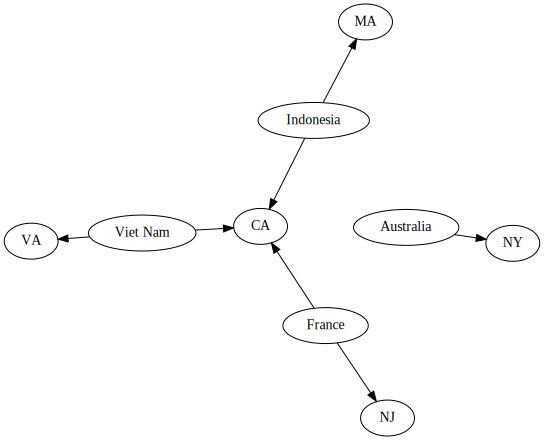

In [23]:
#Q12
dg_df = pd.DataFrame()
dg_df['region'] = df['ip'].apply(eu.lookup_region)
dg_df['file'] = df[['cik', 'accession', 'extention']].astype('str').agg('/'.join, axis=1)
dg_df = dg_df[dg_df['region'].isin(["Australia", "France", "Indonesia", "Viet Nam"])]
dg_df['file'] = dg_df['file'].apply(conv_state)
dg_df = dg_df[dg_df['file'] != 'blank']
dg_df.drop(103284, axis=0, inplace=True)
dg_df = dg_df.reset_index()

g = Digraph(engine='neato')
for idx in range(len(dg_df)):
    reg = dg_df.at[idx, 'region']
    st = dg_df.at[idx, 'file']
    g.edge(reg, st, len='1.5')
g